In [2]:
from pathlib import Path
import os

dataset_dir = Path("../data/dataset")

if not dataset_dir.is_dir():
    print("Dataset directory not found. Downloading dataset...")
    kaggle_dataset = "sumaiyatasmeem/heart-disease-classification-dataset"
    output_path = "../data/"

    # Download dataset using Kaggle API
    os.system(f"kaggle datasets download -d {kaggle_dataset} -p {output_path}")

    # Unzip the dataset
    os.system(f"unzip {output_path}/*.zip -d {output_path}")

    # Ensure proper directory structure
    dataset_dir.mkdir(parents=True, exist_ok=True)
    for file in Path(output_path).glob("*"):
        if file.suffix == ".csv":
            file.rename(dataset_dir / file.name)

    # Cleanup
    for file in Path(output_path).glob("*.zip"):
        file.unlink()

    print(f"Dataset downloaded and extracted to: {dataset_dir}")
else:
    print(f"Current dataset dir: {dataset_dir}")


Dataset directory not found. Downloading dataset...
Dataset downloaded and extracted to: ../data/dataset


In [83]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df=pd.read_csv('../data/dataset/heart disease classification dataset.csv')

In [85]:
df.shape

(303, 15)

In [86]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [87]:
df = df.drop(columns=['Unnamed: 0'])

In [88]:
df['target']=df['target'].map({'yes':1,'no':0})
df['sex']=df['sex'].map({'male':1,'female':0})

In [89]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


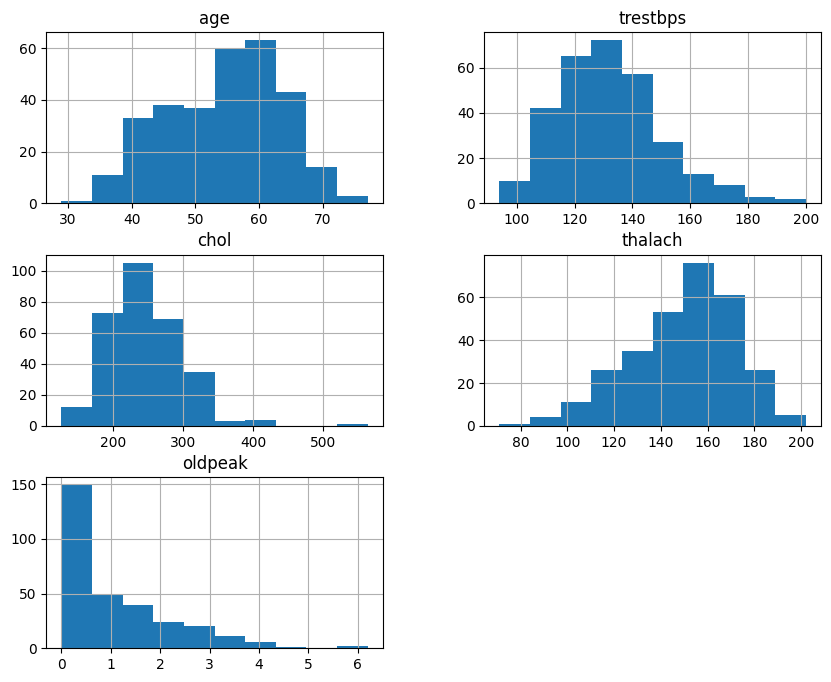

In [90]:
import matplotlib.pyplot as plt
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].hist(figsize=(10, 8))
plt.show()


In [91]:
df['trestbps'].fillna(df['trestbps'].median(),inplace=True)
df['chol'].fillna(df['chol'].median(),inplace=True)
df['thalach'].fillna(df['thalach'].median(),inplace=True)

<ipython-input-91-29b76cbb4718>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trestbps'].fillna(df['trestbps'].median(),inplace=True)
<ipython-input-91-29b76cbb4718>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [92]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [93]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.68976

In [94]:
pd.crosstab(index=df.target, columns=df.sex)

sex,0,1
target,,
0,24,114
1,72,93


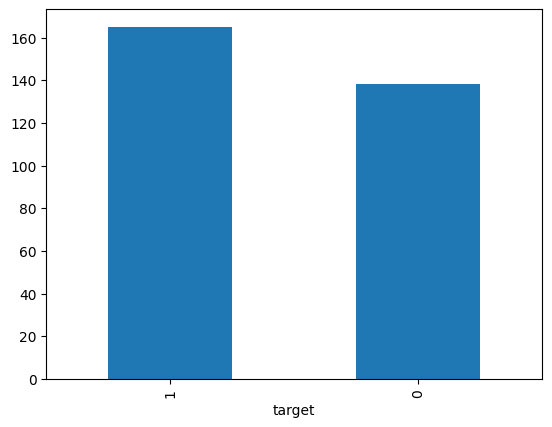

In [95]:
df.target.value_counts().plot(kind="bar");

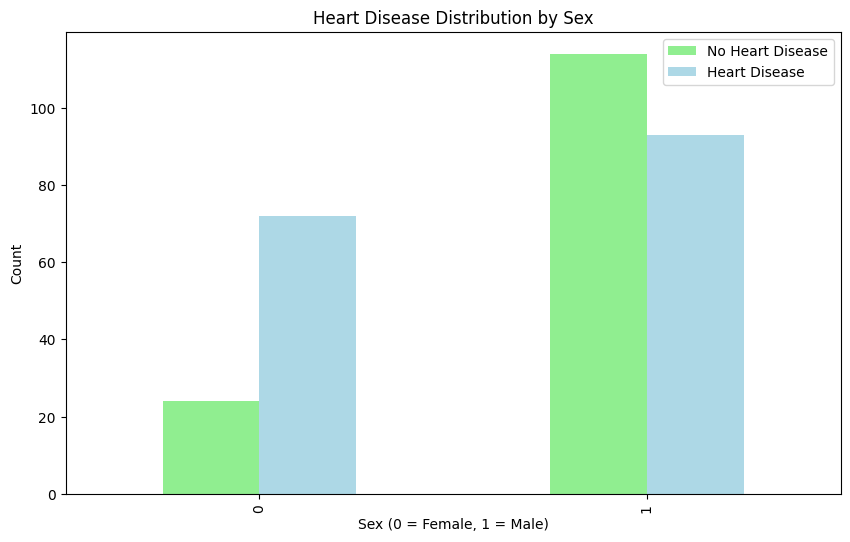

In [96]:
grouped_data = df.groupby(['sex', 'target']).size().unstack()
grouped_data.plot(kind="bar",
                  figsize=(10, 6),
                  color=["lightgreen", "lightblue"])
plt.title("Heart Disease Distribution by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

In [97]:
Correlation_matrix = df.corr()
Correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279391,0.213534,0.121308,-0.116211,-0.393889,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.062394,-0.197484,0.045032,-0.058196,-0.051346,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047797,-0.077544,0.094444,0.044421,0.299584,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279391,-0.062394,0.047797,1.000000,0.125550,0.176209,-0.110873,-0.028536,0.069108,0.193691,-0.121031,0.098837,0.060363,-0.141687
chol,0.213534,-0.197484,-0.077544,0.125550,1.000000,0.013016,-0.150460,-0.022395,0.066566,0.053359,-0.003384,0.070699,0.098474,-0.085984
fbs,0.121308,0.045032,0.094444,0.176209,0.013016,1.000000,-0.084189,0.002943,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.110873,-0.150460,-0.084189,1.000000,0.038133,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.393889,-0.051346,0.299584,-0.028536,-0.022395,0.002943,0.038133,1.000000,-0.395906,-0.346365,0.379017,-0.206977,-0.106423,0.409034
exang,0.096801,0.141664,-0.394280,0.069108,0.066566,0.025665,-0.070733,-0.395906,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193691,0.053359,0.005747,-0.058770,-0.346365,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


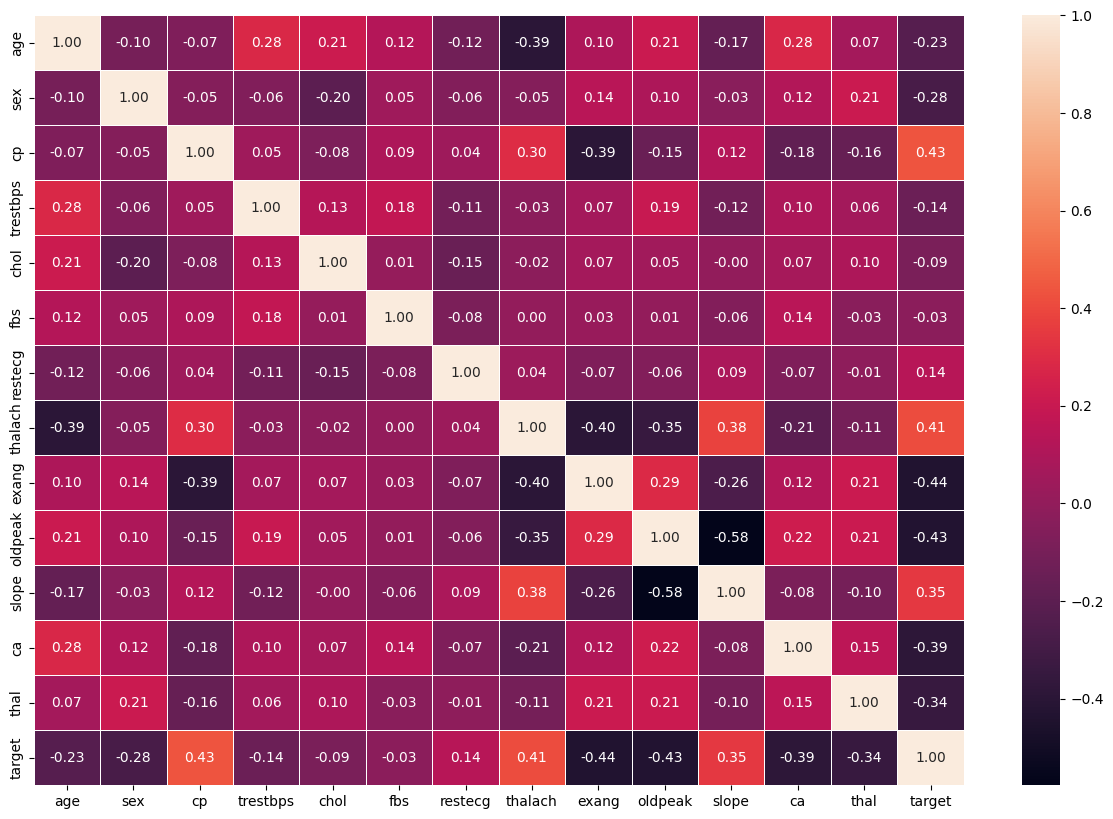

In [98]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f");

In [99]:
x=df.drop(labels="target",axis=1)
y=df.target.to_numpy()

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.45)

In [102]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=100), # Note: if you see a warning about "convergence not reached", you can increase `max_iter` until convergence is reached
          "Random Forest": RandomForestClassifier()}


In [103]:
def fit_and_score(models, x_train, x_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [104]:
model_selection = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_selection

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6204379562043796,
 'Logistic Regression': 0.8394160583941606,
 'Random Forest': 0.8613138686131386}

In [105]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
y_pred=model.predict(x_test)

In [107]:
model.score(x_test,y_test)

0.8394160583941606

In [121]:
np.random.seed(42)
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=20,
    verbose=True,
    random_state=42
)
rs_log_reg.fit(x_train, y_train)
print("\nBest Logistic Regression Parameters:", rs_log_reg.best_params_)
print("Logistic Regression Test Accuracy:", rs_log_reg.score(x_test, y_test))

# Randomized Search for Random Forest
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5,
    n_iter=20,
    verbose=True,
    random_state=42
)
rs_rf.fit(x_train, y_train)
print("\nBest Random Forest Parameters:", rs_rf.best_params_)
print("Random Forest Test Accuracy:", rs_rf.score(x_test, y_test))

# Evaluate the best Random Forest model
best_rf = rs_rf.best_estimator_
print("\nEvaluating Random Forest...")
y_pred_rf = best_rf.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Logistic Regression Parameters: {'solver': 'liblinear', 'C': 11.288378916846883}
Logistic Regression Test Accuracy: 0.8394160583941606
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Random Forest Parameters: {'n_estimators': 210, 'min_samples_split': 4, 'min_samples_leaf': 19, 'max_depth': 3}
Random Forest Test Accuracy: 0.8394160583941606

Evaluating Random Forest...
Random Forest Accuracy: 0.8394160583941606
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.81        62
           1       0.81      0.92      0.86        75

    accuracy                           0.84       137
   macro avg       0.85      0.83      0.83       137
weighted avg       0.84      0.84      0.84       137

Confusion Matrix:
 [[46 16]
 [ 6 69]]



Best Random Forest Parameters: {'n_estimators': 710, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_depth': None}

Evaluating Random Forest...
Random Forest Accuracy: 0.5474452554744526
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.35      0.42        62
           1       0.57      0.71      0.63        75

    accuracy                           0.55       137
   macro avg       0.53      0.53      0.52       137
weighted avg       0.54      0.55      0.53       137

Confusion Matrix:
 [[22 40]
 [22 53]]
